# Testing the Model on real images 

## Image Processing

In [1]:
import os
from PIL import Image

def process_image(image_url):
    # directory to store processed image in
    processed_image_directory = "processed_images"
    os.makedirs(processed_image_directory, exist_ok=True)
    # how to name the current test image
    image_name = "current_test_image.jpg"

    try:
        image = Image.open(image_url).convert("RGB")
    # incase the image url provided has a problem
    except:
        raise FileNotFoundError(f"Error while trying to load image '{image_url}'. Please check the image URL well.")
    
    # resizing image and saving it
    image = image.resize((28, 28))
    image.save(os.path.join(processed_image_directory, image_name))
    print(f"Processed Image saved to '{os.path.join(processed_image_directory, image_name)}'")

In [21]:
import os
import cv2
import numpy as np

def get_test_image_array(test_image_url=f"{os.path.join('processed_images', 'current_test_image.jpg')}"):
    # loading the test image
    try:
        image = cv2.imread(test_image_url)
    except:
        raise FileNotFoundError(f"Error while trying to load test image '{test_image_url}'")
    # converting test image to black and white
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # getting a numpy array from the test image
    image_array = np.array(image_gray)
    return np.full(784, 255, dtype=int) - image_array.reshape(784)

## Loading the Model

In [3]:
import pickle
import os

# function for loading current saved model
def load_current_model(model_name="01_current_model.pkl"):
    # some variables to use
    directory_name = "saved_models"

    # in case no model has been saved before
    if os.path.isdir(directory_name):
        try:
            with open(os.path.join(directory_name, model_name), "rb") as f:
                return pickle.load(f)
        # in case it there's a problem when trying to laod the model from the file
        except Exception as e:
            print(e)
            print(f"Error while trying to load model '{os.path.join(directory_name, model_name)}'")
    # in case there is no saved model yet        
    else:
        raise FileNotFoundError(f"No such directory '.\\{directory_name}\\'")

## Function for plotting digit

In [10]:
import matplotlib.pyplot as plt

def plot_digit(digit_aray):
    # a function for plotting the digit given it's array
    plt.imshow(digit_aray.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.show()

## Testing Model on All test Images

In [4]:
import os

def do_test(image_url, model):
    # processing image and handling possible errors
    try:
        process_image(image_url)
    except:
        print(f"ERROR: Cannot find file named '{image_url}'")
        return
    
    # getting the image array from processed image
    image_array = get_test_image_array()

    # making prediction with loaded model
    prediction = model.predict([image_array])

    digit = int(image_url[-5])

    # giving value to mark depending on the accuracy
    if digit == prediction[0]:
        mark = "✅"
    else:
        mark = "🔴"

    # displaying results to the user
    print(f"Expected Result: {digit} ----- Predicted: {prediction[0]} ----- {mark}")


In [23]:
import os

# loading model
model = load_current_model()

# making the test for all images
directory_name = "test_images"
image_names = [name for name in os.listdir(directory_name) if os.path.isfile(os.path.join(directory_name, name))]

print(model)
for image_name in image_names[-1:-10:-1]:
    do_test(os.path.join(directory_name, image_name), model)

print("\nDONE!")

Pipeline(steps=[('scaler', StandardScaler()), ('sv_classifier', SVC())])
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 9 ----- Predicted: 1 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 8 ----- Predicted: 5 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 7 ----- Predicted: 1 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 6 ----- Predicted: 5 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 5 ----- Predicted: 5 ----- ✅
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 4 ----- Predicted: 5 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 3 ----- Predicted: 5 ----- 🔴
Processed Image saved to 'processed_images\current_test_image.jpg'
Expected Result: 2 ----- Predicted: 1 ----- 🔴
Processed Image saved t

Processed Image saved to 'processed_images\current_test_image.jpg'


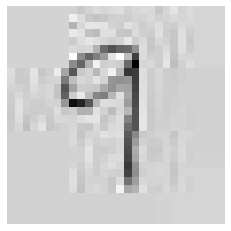

In [22]:
process_image("./test_images/p9.jpg")
plot_digit(get_test_image_array())